In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
train_df = pd.read_csv('data/train.csv', sep=';')
test_df = pd.read_csv('data/test.csv', sep=';')

In [136]:
train_df.head()

waktu_setempat   id_jalan  id_titik_mulai  id_titik_akhir   
0  2020-02-01 01:00:00+00:00  691007296        21390008      1425033102  \
1  2020-02-01 01:00:00+00:00   47010584      1677092762       579493410   
2  2020-02-01 01:00:00+00:00   22932408        26486694      1930267566   
3  2020-02-01 01:00:00+00:00  142479648      1111592522      3775231113   
4  2020-02-01 01:00:00+00:00    8504977      5940503398      5940503394   

   rerata_kecepatan  max_speed_kph  lanes  lanes_forward  lanes_backward   
0            29.126       48.28032      3              2               1  \
1            46.576       48.28032      4              1               1   
2            36.587       32.18688      2              1               1   
3            34.063       32.18688      3              1               1   
4            38.336       48.28032      2              1               1   

   busway    highway  concat_mulai_akhir   distance  
0       0      trunk        2.140000e+17   7.914363  
1       2    primary        1.680000e+18  19.984653  
2       0  secondary        2.650000e+17  44.684593  
3       1    primary        1.110000e+19  82.340453  
4       0    primary        5.940000e+19  29.117877

In [137]:
train_df.head()

waktu_setempat   id_jalan  id_titik_mulai  id_titik_akhir   
0  2020-02-01 01:00:00+00:00  691007296        21390008      1425033102  \
1  2020-02-01 01:00:00+00:00   47010584      1677092762       579493410   
2  2020-02-01 01:00:00+00:00   22932408        26486694      1930267566   
3  2020-02-01 01:00:00+00:00  142479648      1111592522      3775231113   
4  2020-02-01 01:00:00+00:00    8504977      5940503398      5940503394   

   rerata_kecepatan  max_speed_kph  lanes  lanes_forward  lanes_backward   
0            29.126       48.28032      3              2               1  \
1            46.576       48.28032      4              1               1   
2            36.587       32.18688      2              1               1   
3            34.063       32.18688      3              1               1   
4            38.336       48.28032      2              1               1   

   busway    highway  concat_mulai_akhir   distance  
0       0      trunk        2.140000e+17   7.914363  
1       2    primary        1.680000e+18  19.984653  
2       0  secondary        2.650000e+17  44.684593  
3       1    primary        1.110000e+19  82.340453  
4       0    primary        5.940000e+19  29.117877

In [138]:
train_df.columns

Index(['waktu_setempat', 'id_jalan', 'id_titik_mulai', 'id_titik_akhir',
       'rerata_kecepatan', 'max_speed_kph', 'lanes', 'lanes_forward',
       'lanes_backward', 'busway', 'highway', 'concat_mulai_akhir',
       'distance'],
      dtype='object')

In [139]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127489 entries, 0 to 127488
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  127489 non-null  int64  
 1   waktu_setempat      127489 non-null  object 
 2   id_jalan            127489 non-null  int64  
 3   id_titik_mulai      127489 non-null  int64  
 4   id_titik_akhir      127489 non-null  int64  
 5   max_speed_kph       127489 non-null  float64
 6   lanes               127489 non-null  int64  
 7   lanes_forward       127489 non-null  int64  
 8   lanes_backward      127489 non-null  int64  
 9   busway              127489 non-null  int64  
 10  highway             127489 non-null  object 
 11  concat_mulai_akhir  127489 non-null  object 
 12  distance            127489 non-null  float64
dtypes: float64(2), int64(8), object(3)
memory usage: 12.6+ MB


In [140]:
train_df['waktu_setempat'] = pd.to_datetime(train_df['waktu_setempat'])
test_df['waktu_setempat'] = pd.to_datetime(test_df['waktu_setempat'])

In [141]:
train_df['hour'] = train_df['waktu_setempat'].dt.hour
train_df['week'] = train_df['waktu_setempat'].dt.isocalendar().week
train_df['day_of_week'] = train_df['waktu_setempat'].dt.dayofweek
train_df['day_of_month'] = train_df['waktu_setempat'].dt.day
train_df['week'] = train_df['week'].astype(int)

In [142]:
test_df['hour'] = test_df['waktu_setempat'].dt.hour
test_df['week'] = test_df['waktu_setempat'].dt.isocalendar().week
test_df['day_of_week'] = test_df['waktu_setempat'].dt.dayofweek
test_df['day_of_month'] = test_df['waktu_setempat'].dt.day
test_df['week'] = test_df['week'].astype(int)

In [143]:
train_df = pd.get_dummies(train_df, columns=['highway'], prefix='highway')
test_df = pd.get_dummies(test_df, columns=['highway'], prefix='highway')

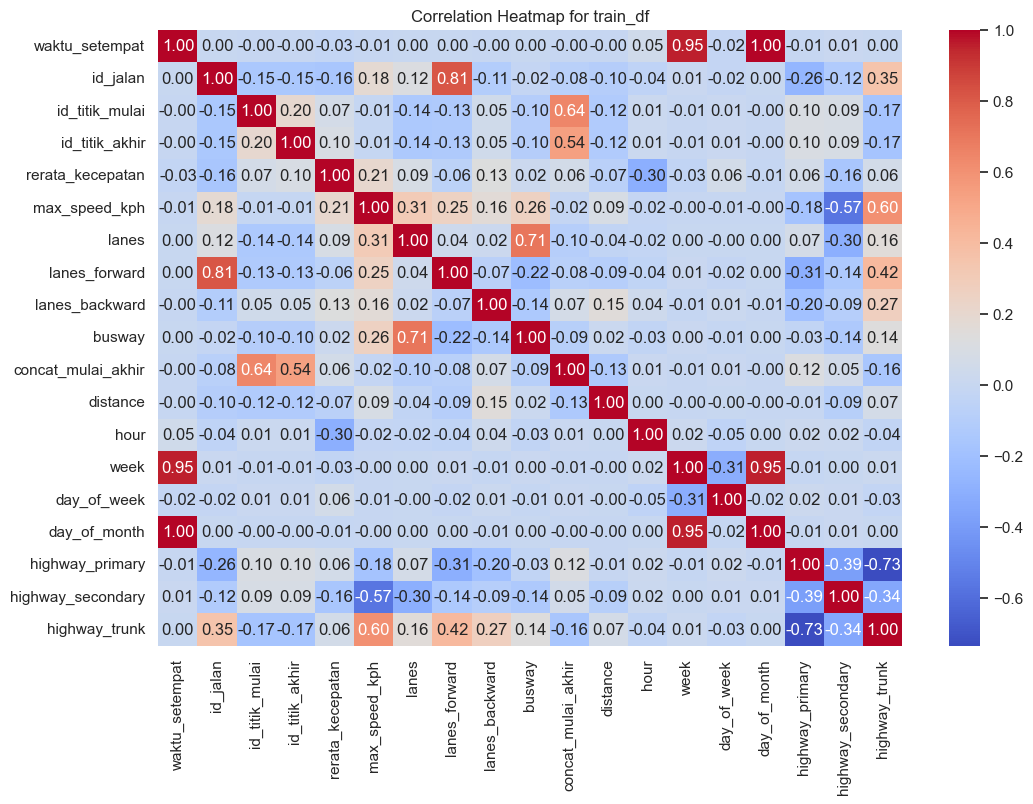

In [144]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the DataFrame as 'train_df'
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap for train_df")
plt.show()

In [145]:
train_df = pd.get_dummies(train_df, columns=['id_jalan'], prefix='id_jalan')
test_df = pd.get_dummies(test_df, columns=['id_jalan'], prefix='id_jalan')

In [146]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398648 entries, 0 to 398647
Data columns (total 38 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   waktu_setempat      398648 non-null  datetime64[ns, UTC]
 1   id_titik_mulai      398648 non-null  int64              
 2   id_titik_akhir      398648 non-null  int64              
 3   rerata_kecepatan    398648 non-null  float64            
 4   max_speed_kph       398648 non-null  float64            
 5   lanes               398648 non-null  int64              
 6   lanes_forward       398648 non-null  int64              
 7   lanes_backward      398648 non-null  int64              
 8   busway              398648 non-null  int64              
 9   concat_mulai_akhir  398648 non-null  float64            
 10  distance            398648 non-null  float64            
 11  hour                398648 non-null  int32              
 12  week            

In [147]:
train_df.drop(columns=['busway', 'waktu_setempat', 'day_of_month', 'week',
              'lanes_forward', 'lanes_backward', 'concat_mulai_akhir'], inplace=True)
test_df.drop(columns=['busway', 'waktu_setempat', 'day_of_month', 'week',
             'lanes_forward', 'lanes_backward', 'concat_mulai_akhir'], inplace=True)

In [148]:
# Remove outliers from 'rerata_kecepatan' column
Q1 = train_df['rerata_kecepatan'].quantile(0.25)
Q3 = train_df['rerata_kecepatan'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

train_df = train_df[(train_df['rerata_kecepatan'] >= lower_bound) & (
    train_df['rerata_kecepatan'] <= upper_bound)]

In [149]:
# import matplotlib.pyplot as plt

# # Plot histogram
# plt.hist(train_df['rerata_kecepatan'], bins=75, edgecolor='black')

# # Add labels and title
# plt.xlabel('Rerata Kecepatan')
# plt.ylabel('Frequency')
# plt.title('Histogram of Rerata Kecepatan')

# # Show the chart
# plt.show()

In [150]:
# Train - Test Split
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Function to calculate sMAPE


def smape(actual, forecast):
    return 100 * np.mean(2 * np.abs(forecast - actual) / (np.abs(actual) + np.abs(forecast)))


X = train_df.drop(columns=['rerata_kecepatan'])
# X = train_df.drop(columns=['rerata_kecepatan', 'lanes', 'lanes_forward', 'lanes_backward'])
# X = train_df.drop(columns=['rerata_kecepatan', 'busway', 'lanes_forward', 'lanes_backward'])

y = train_df['rerata_kecepatan']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [151]:
# Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
y_pred_linear_reg = linear_reg_model.predict(X_test)
smape_linear_reg = smape(y_test, y_pred_linear_reg)
print("Linear Regression sMAPE:", smape_linear_reg)

Linear Regression sMAPE: 13.13634384988056


In [152]:
from xgboost import XGBRegressor

# XGBRegressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
smape_xgb = smape(y_test, y_pred_xgb)
print("XGBoost sMAPE:", smape_xgb)

XGBoost sMAPE: 7.209511651965711


In [162]:
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators': [100, 200, 500],
        'objective': ['reg:squarederror']
    }

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator=xgb_model,
                           param_grid=param_tuning,
                           cv=5,
                           n_jobs=-1,
                           verbose=1)

    gsearch.fit(X_train, y_train)

    return gsearch.best_params_

In [163]:
hyperParameterTuning(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 10,
 'min_child_weight': 5,
 'n_estimators': 500,
 'objective': 'reg:squarederror',
 'subsample': 0.7}

In [165]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np

xgb_model = XGBRegressor(
    objective='reg:squarederror',
    colsample_bytree=0.5,
    learning_rate=0.1,
    max_depth=10,
    min_child_weight=5,
    n_estimators=500,
    subsample=0.7
)

%time xgb_model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)], verbose=False)

y_pred_xgb = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

print("MAE:", mae_xgb)

smape_xgb = smape(y_test, y_pred_xgb)
print("sMAPE:", smape_xgb)

c:\Users\Fikri\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


CPU times: total: 5min
Wall time: 2min 28s
MAE: 2.2480549339295224
sMAPE: 6.6450158478763965


In [170]:
id_series = test_df['id']
id_df = pd.DataFrame({'id': id_series})

test_df.drop(columns=['id'], inplace=True)
# test_df.drop(columns=['id', 'lanes', 'lanes_forward', 'lanes_backward'], inplace=True)
# test_df.drop(columns=['id', 'busway', 'lanes_forward', 'lanes_backward'], inplace=True)

In [169]:
y_results = xgb_model.predict(test_df)
y_results_df = pd.DataFrame({'rerata_kecepatan': y_results})

# Concatenate id_df and y_results_df horizontally
result_df = pd.concat([id_df, y_results_df], axis=1)
print(result_df)

# Store the concatenated DataFrame to a CSV file
result_df.to_csv('Data/submission.csv', index=False)

print("Data saved to 'data/submission.csv'")

            id  rerata_kecepatan
0            0         42.908737
1            1         38.378323
2            2         35.922153
3            3         44.564171
4            4         28.703049
...        ...               ...
127484  127484         31.203430
127485  127485         36.901417
127486  127486         41.011883
127487  127487         34.298061
127488  127488         44.832226

[127489 rows x 2 columns]
Data saved to 'data/submission.csv'
